# tf.dataを使って画像をロードする

https://www.tensorflow.org/tutorials/load_data/images

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [10]:
import pathlib
#data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         #fname='flower_photos', untar=True)
data_root = pathlib.Path("/root/.keras/datasets/flower_photos")
print(data_root)

/root/.keras/datasets/flower_photos


In [11]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/daisy


In [12]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [13]:
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/tulips/4353419275_79d3904074_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/3581252194_8c976d333a_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/133692329_c1150ed811_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/3002863623_cd83d6e634.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/18250039435_7654bc11be_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/14376454225_a1de336c5b.jpg',
 '/root/.keras/datasets/flower_photos/tulips/8713396140_5af8136136.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/15207507116_8b7f894508_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/6876631336_54bf150990.jpg']

In [14]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [15]:
attributions

{'daisy/7568630428_8cf0fc16ff_n.jpg': ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg': ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg': ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n',
 'daisy/8759177308_951790e00d_m.jpg': ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n',
 'daisy/4131565290_0585c4dd5a_n.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4131565290/\n',
 'daisy/3504430338_77d6a7fab4_n.jpg': ' by Dhilung Kirat - https://www.flickr.com/photos/dhilung/3504430338/\n',
 'daisy/3084924076_4d5c5711af_m.jpg': ' by Bùi Linh Ngân - https://www.flickr.com/photos/linhngan/3084924076/\n',
 'daisy/2642408410_61545fdc83_n.jpg': ' by D

In [16]:
import IPython.display as display

def caption_image(image_path):
  image_rel = pathlib.Path(image_path).relative_to(data_root)
  return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

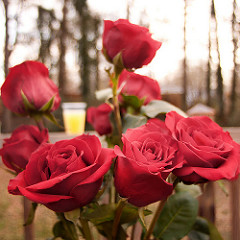

Image (CC BY 2.0)  by Ally Mauro



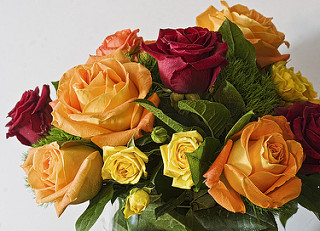

Image (CC BY 2.0)  by liz west



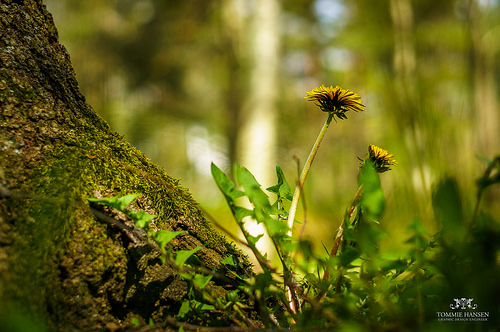

Image (CC BY 2.0)  by Tommie Hansen



In [17]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [18]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [19]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [20]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [4, 1, 4, 4, 4, 3, 1, 4, 3, 4]


In [21]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/tulips/4353419275_79d3904074_n.jpg'

In [22]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [23]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(240, 320, 3)
<dtype: 'uint8'>


In [24]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [25]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [26]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

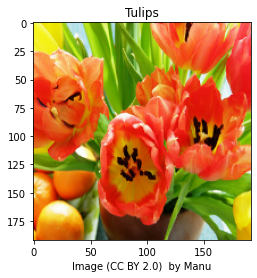

In [27]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [28]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [29]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [36]:
next(iter(path_ds.batch(10)))

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'/root/.keras/datasets/flower_photos/tulips/4353419275_79d3904074_n.jpg',
       b'/root/.keras/datasets/flower_photos/dandelion/3581252194_8c976d333a_n.jpg',
       b'/root/.keras/datasets/flower_photos/tulips/133692329_c1150ed811_n.jpg',
       b'/root/.keras/datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg',
       b'/root/.keras/datasets/flower_photos/tulips/3002863623_cd83d6e634.jpg',
       b'/root/.keras/datasets/flower_photos/sunflowers/18250039435_7654bc11be_n.jpg',
       b'/root/.keras/datasets/flower_photos/dandelion/14376454225_a1de336c5b.jpg',
       b'/root/.keras/datasets/flower_photos/tulips/8713396140_5af8136136.jpg',
       b'/root/.keras/datasets/flower_photos/sunflowers/15207507116_8b7f894508_m.jpg',
       b'/root/.keras/datasets/flower_photos/tulips/6876631336_54bf150990.jpg'],
      dtype=object)>

In [37]:
for batch_i in path_ds.batch(10):
    print(batch_i)


tf.Tensor(
[b'/root/.keras/datasets/flower_photos/tulips/4353419275_79d3904074_n.jpg'
 b'/root/.keras/datasets/flower_photos/dandelion/3581252194_8c976d333a_n.jpg'
 b'/root/.keras/datasets/flower_photos/tulips/133692329_c1150ed811_n.jpg'
 b'/root/.keras/datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'
 b'/root/.keras/datasets/flower_photos/tulips/3002863623_cd83d6e634.jpg'
 b'/root/.keras/datasets/flower_photos/sunflowers/18250039435_7654bc11be_n.jpg'
 b'/root/.keras/datasets/flower_photos/dandelion/14376454225_a1de336c5b.jpg'
 b'/root/.keras/datasets/flower_photos/tulips/8713396140_5af8136136.jpg'
 b'/root/.keras/datasets/flower_photos/sunflowers/15207507116_8b7f894508_m.jpg'
 b'/root/.keras/datasets/flower_photos/tulips/6876631336_54bf150990.jpg'], shape=(10,), dtype=string)
tf.Tensor(
[b'/root/.keras/datasets/flower_photos/daisy/5435522104_1d6a61b431_n.jpg'
 b'/root/.keras/datasets/flower_photos/sunflowers/9610373158_5250bce6ac_n.jpg'
 b'/root/.keras/datasets/flower_photos/

In [38]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [40]:
next(iter(image_ds.take(1)))

<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
array([[[9.8088235e-01, 9.8349673e-01, 2.8562090e-01],
        [9.7941178e-01, 9.7598040e-01, 3.0147058e-01],
        [9.7843134e-01, 9.6928108e-01, 3.3382353e-01],
        ...,
        [9.9019659e-01, 3.0277771e-01, 3.1846514e-01],
        [9.7058821e-01, 3.3186275e-01, 3.2745099e-01],
        [9.7761464e-01, 5.9182715e-01, 5.3186125e-01]],

       [[9.6160132e-01, 9.6094775e-01, 2.6666668e-01],
        [9.7107846e-01, 9.7107846e-01, 2.3284313e-01],
        [9.7336602e-01, 9.7908497e-01, 2.3611110e-01],
        ...,
        [9.7189468e-01, 3.2581696e-01, 3.1061968e-01],
        [9.8137254e-01, 3.1715685e-01, 3.4264705e-01],
        [9.7401959e-01, 6.6486669e-01, 5.8676261e-01]],

       [[9.5424837e-01, 9.6993464e-01, 1.2369281e-01],
        [9.7107846e-01, 9.7107846e-01, 1.7892157e-01],
        [9.7336602e-01, 9.7091502e-01, 2.2630718e-01],
        ...,
        [9.6045637e-01, 3.1928128e-01, 3.0735144e-01],
        [9.7647059e-01

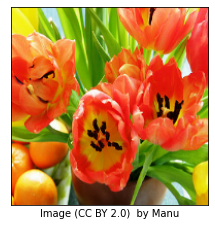

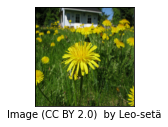

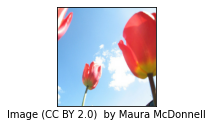

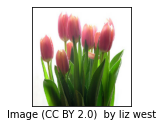

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()

In [43]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [44]:
for label in label_ds.take(4):
  print(label_names[label.numpy()])

tulips
dandelion
tulips
tulips


In [45]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [46]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [47]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
# タプルは展開され、マップ関数の位置引数に割り当てられます
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [48]:
BATCH_SIZE = 32

# シャッフルバッファのサイズをデータセットとおなじに設定することで、データが完全にシャッフルされる
# ようにできます。
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch`を使うことで、モデルの訓練中にバックグラウンドでデータセットがバッチを取得できます。
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [50]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 3s 0us/step


In [53]:
help(tf.keras.applications.mobilenet_v2.preprocess_input)

Help on function preprocess_input in module tensorflow.python.keras.applications.mobilenet_v2:

preprocess_input(x, data_format=None)
    Preprocesses a tensor or Numpy array encoding a batch of images.
    
    Usage example with `applications.MobileNet`:
    
    ```python
    i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
    x = tf.cast(i, tf.float32)
    x = tf.keras.applications.mobilenet.preprocess_input(x)
    core = tf.keras.applications.MobileNet()
    x = core(x)
    model = tf.keras.Model(inputs=[i], outputs=[x])
    
    image = tf.image.decode_png(tf.io.read_file('file.png'))
    result = model(image)
    ```
    
    Args:
      x: A floating point `numpy.array` or a `tf.Tensor`, 3D or 4D with 3 color
        channels, with values in the range [0, 255].
        The preprocessed data are written over the input data
        if the data types are compatible. To avoid this
        behaviour, `numpy.copy(x)` can be used.
      data_format: Optional data format o

In [54]:
def change_range(image,label):
    return 2*image-1, label

keras_ds = ds.map(change_range)

In [55]:
# シャッフルバッファがいっぱいになるまで、データセットは何秒かかかります。
image_batch, label_batch = next(iter(keras_ds))

In [56]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [57]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names))])

In [58]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -2.9260898
max logit: 2.7628222

Shape: (32, 5)


In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [60]:
len(model.trainable_variables)

2

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [62]:
steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [63]:
model.fit(ds, epochs=1, steps_per_epoch=3)

3/3 [==============================] - 5s 162ms/step - loss: 6.8480 - accuracy: 0.3125


In [64]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [65]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [66]:
timeit(ds)

........................
231.0 batches: 3.8293821811676025 s
1930.33749 Images/s
Total time: 5.472261667251587s


In [67]:
ds = image_label_ds.cache()
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [68]:
timeit(ds)

........................
231.0 batches: 0.4925346374511719 s
15008.08154 Images/s
Total time: 1.9518382549285889s


In [69]:
timeit(ds)

........................
231.0 batches: 0.5180094242095947 s
14270.01065 Images/s
Total time: 0.5327222347259521s


In [70]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [71]:
timeit(ds)

........................
231.0 batches: 9.799301862716675 s
754.33945 Images/s
Total time: 15.271117448806763s


In [72]:
timeit(ds)

........................
231.0 batches: 5.108129978179932 s
1447.10492 Images/s
Total time: 7.736218452453613s


In [73]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [74]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [75]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [76]:
timeit(ds)

........................
231.0 batches: 2.9282777309417725 s
2524.35072 Images/s
Total time: 4.436708927154541s


In [77]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [78]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [79]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

In [80]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [81]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [82]:
timeit(ds)

........................
231.0 batches: 5.034929037094116 s
1468.14383 Images/s
Total time: 7.951674222946167s
